Perkenalan:
1. Nama: Muhammad Zukri Al Walidani
2. Phase: 1
3. Batch: 007

Data berikut merupakan data dari konsumen kartu kredit bank. Terdapat berbagai jenis konsumen yang dapat dikategorikan dari behaviournya. Dari data kebiasaan konsumen tersebut dapat dilakukan pendekatan yang lebih baik untuk optimalisasi layanan bank. Untuk itu mari bantu bank tersebut dalam melakukan clustering konsumennya.

Import Pustaka

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.cluster import k_means

Data Loading

In [14]:
df=pd.read_csv('CC GENERAL.csv')

In [15]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
df.TENURE.unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

Eksplorasi Data Sedeharhana

In [17]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Data Preprocessing

In [19]:
#mengisi missing value dengan mean
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [20]:
#mengisi missing value dengan mean
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [21]:
#menghapus kolom
df.drop('CUST_ID',axis=1,inplace=True)

Exploratory Data Analis

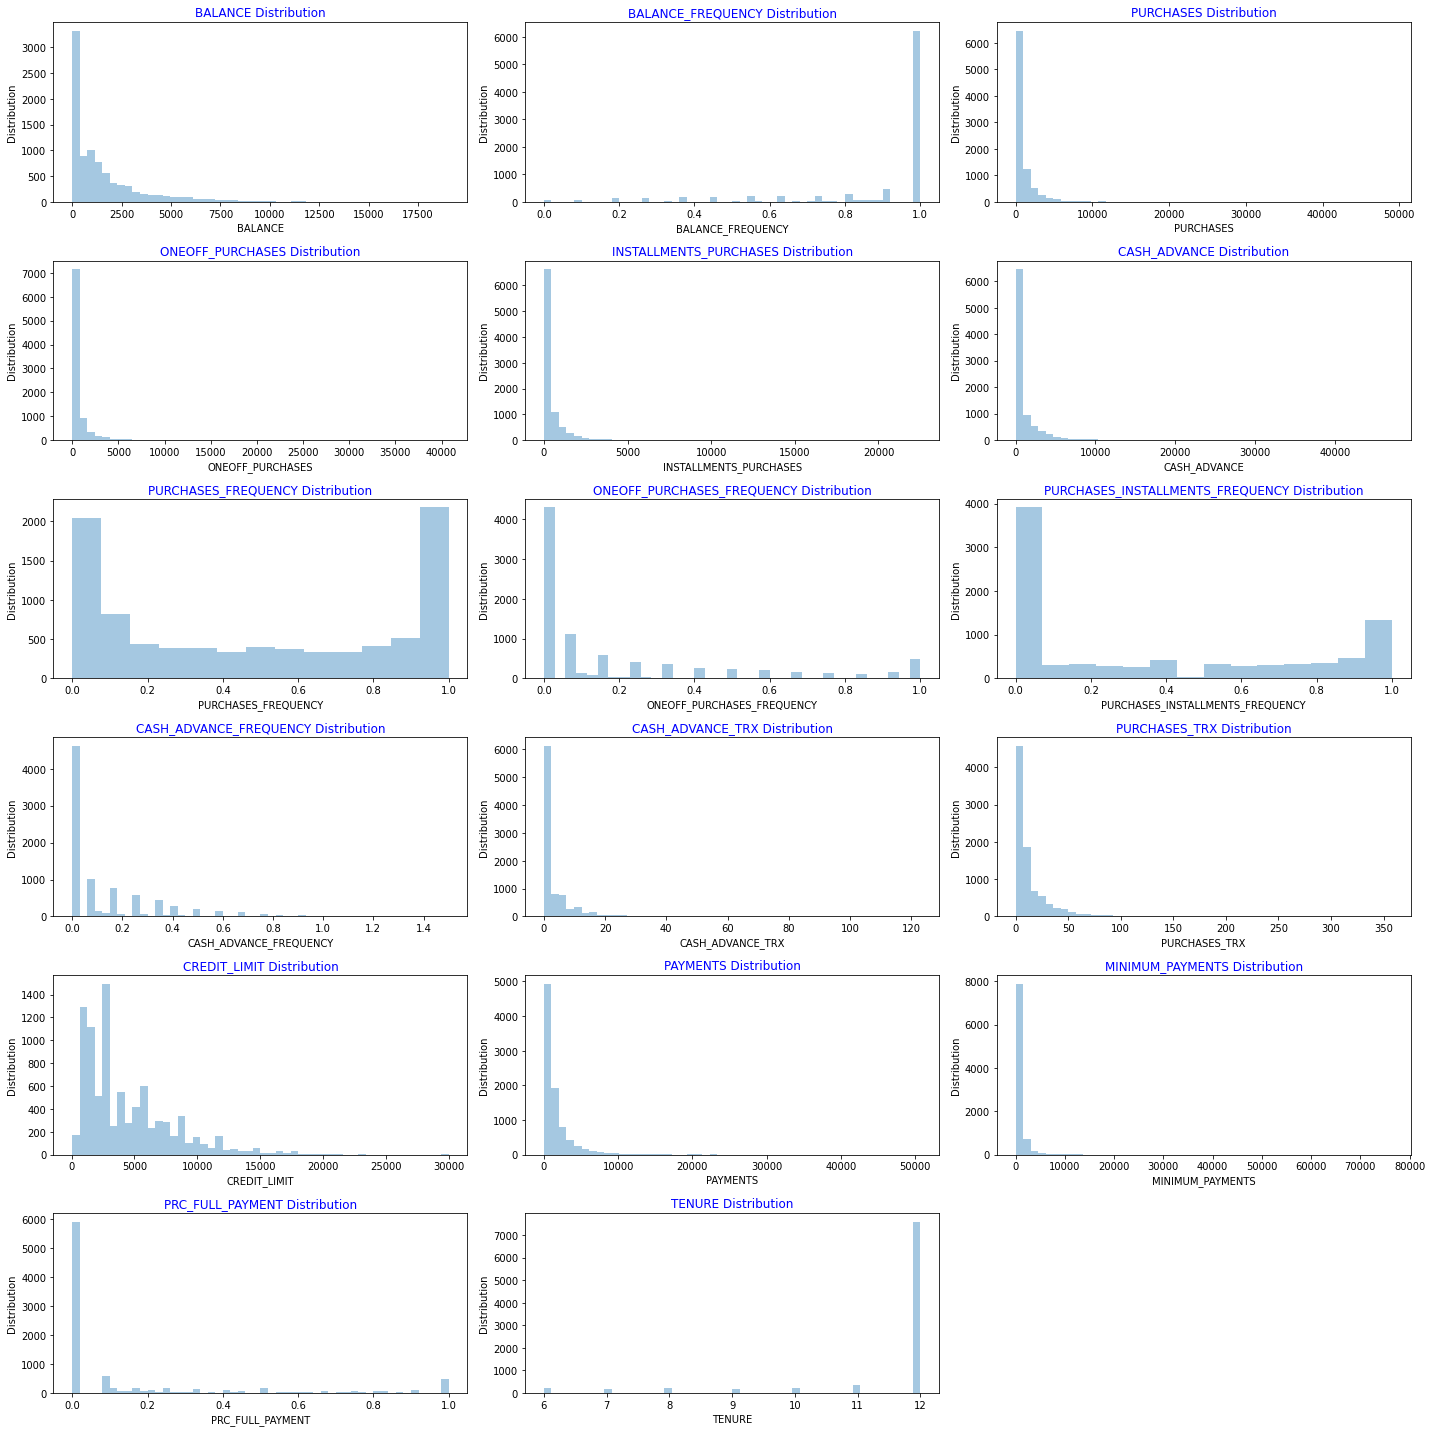

In [26]:
f=plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    ax=f.add_subplot(6,3,i+1)
    sns.distplot(df[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

Data banyak yang berbentuk skewness

In [27]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 
'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [28]:
#normalisasi data
for col in cols:
    df[col] = np.log(1 + df[col])

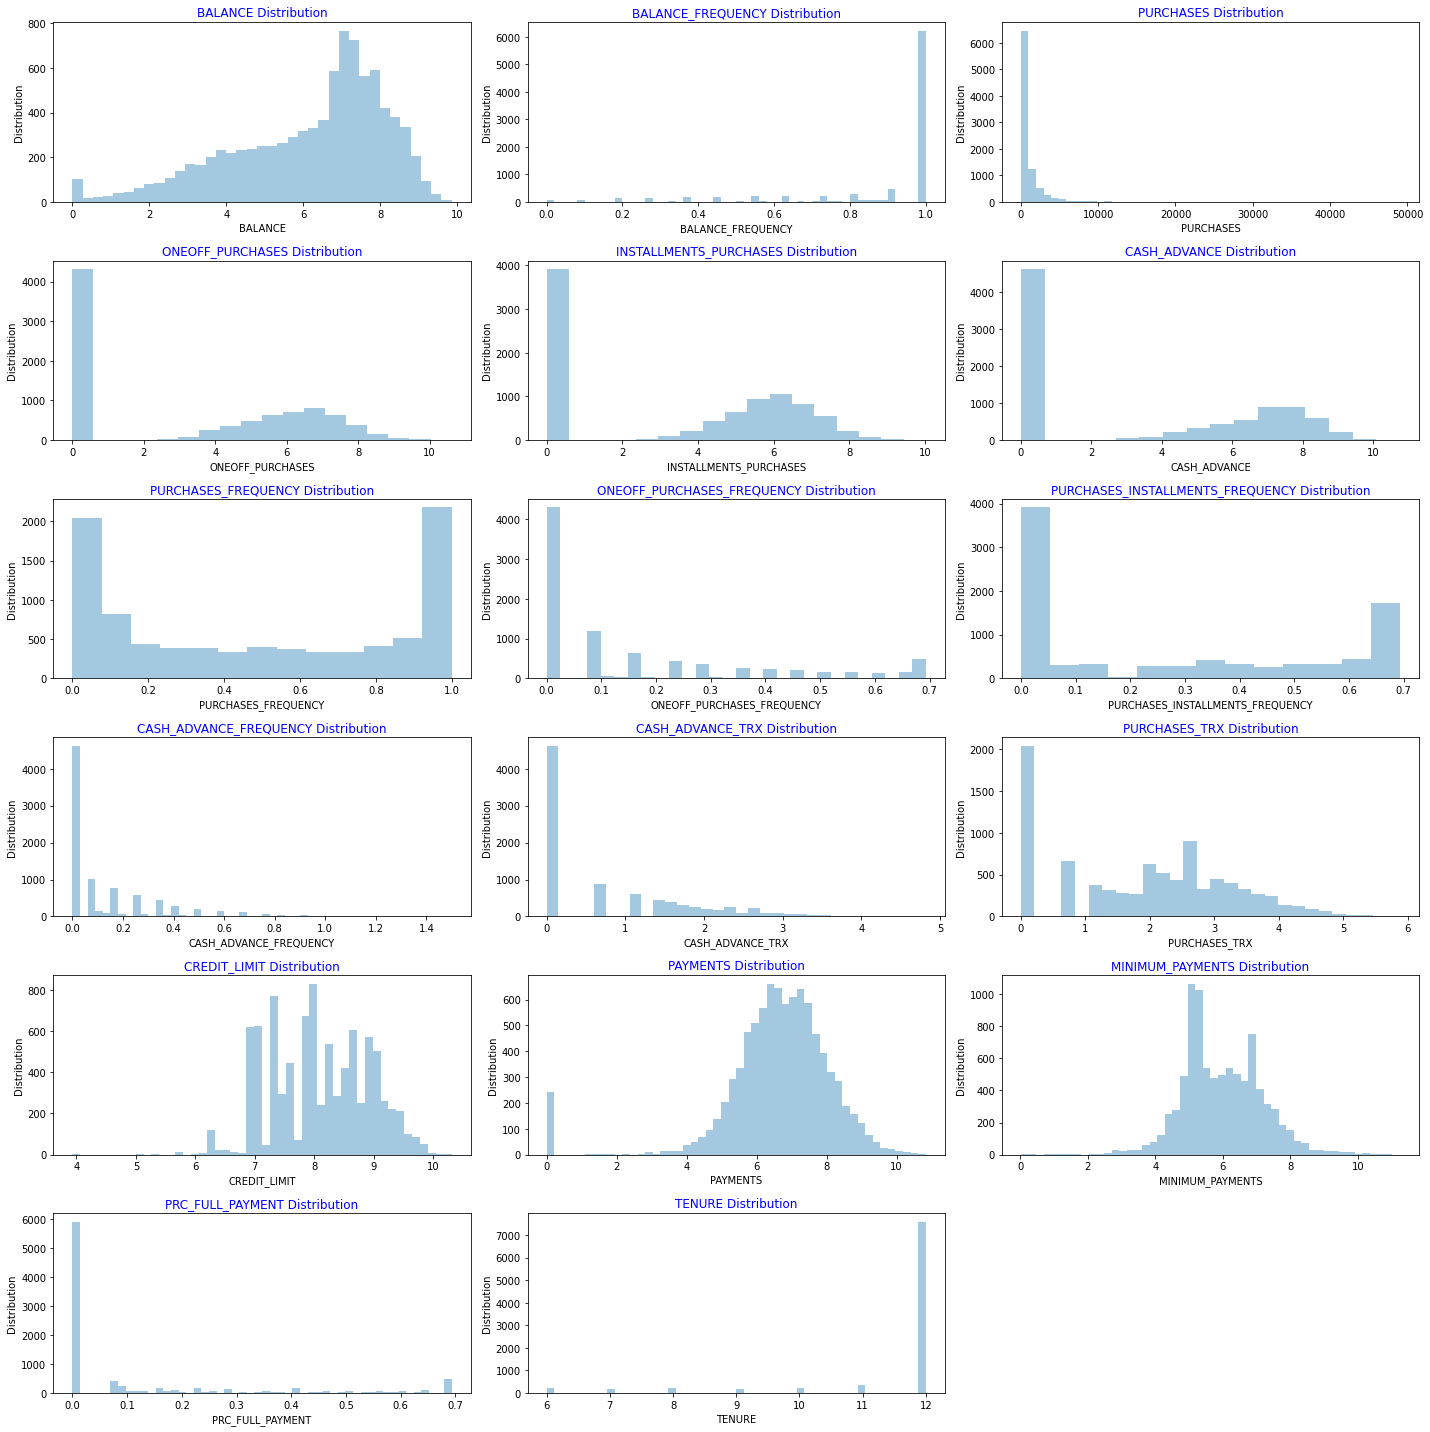

In [29]:
f=plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns):
    ax=f.add_subplot(6,3,i+1)
    sns.distplot(df[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

Insight:
1. data sudah lebih baik dari sebelumnya (setelah dilakukan preprocessing)
2. Tenor pembayaran kredit paling banyak pada tenor 12 bulan, hal ini terjadi karena semakin lama tenggat waktu konsumen lebih memiliki kesempatan untuk membayar.

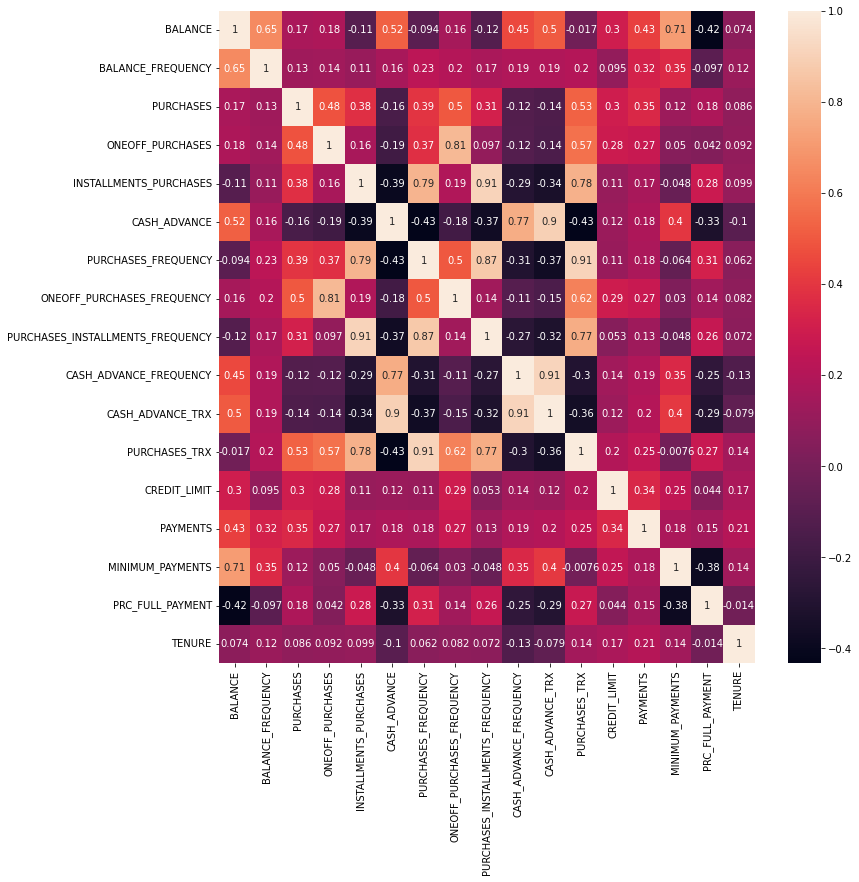

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Insight:
1. variabel berkorelasi dengan dirinya sendiri.
2. Korelasi paling tinggi ada pada Cash_advance_frekuensi dan cash_advance_trx

In [32]:
#reduksi dimensi
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df)

Model Definition dan Model Training

In [33]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

Model Evaluation

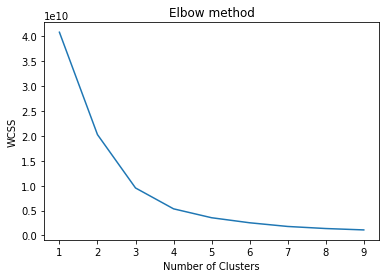

In [34]:
plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

berdasarkan elbow terdapat 2 kandidat yang dapat dijadikan cluster yaitu 2 dan 3

In [35]:
#percobaan menggunakan 2 cluster
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.87005410987208


In [36]:
#percobaan menggunakan 3 cluster
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.798440539715259


In [37]:
#percobaan menggunakan 4 cluster
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.7364796222756741


In [42]:
#penetapan cluster yaitu dengan score silhoute 0.87
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.87005410987208


In [62]:
df['cluster_kmeans'] = kmeans.labels_

In [44]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,3.735304,0.818182,95.40,0.000000,4.568506,0.000000,0.166667,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12,0
1,8.071989,0.909091,0.00,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,12,0
2,7.822504,1.000000,773.17,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12,0
3,7.419183,0.636364,1499.00,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,12,0
4,6.707735,1.000000,16.00,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12,0


Model Inference

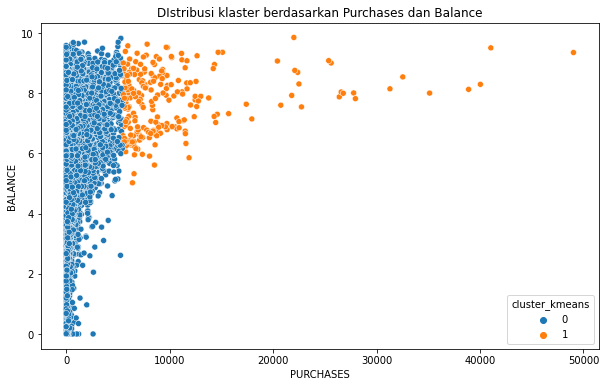

In [109]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PURCHASES', y='BALANCE', hue='cluster_kmeans')
plt.title('DIstribusi klaster berdasarkan Purchases dan Balance')
plt.show()

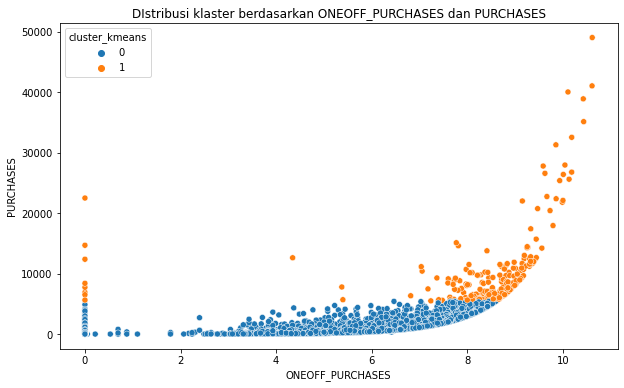

In [110]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_kmeans')
plt.title('DIstribusi klaster berdasarkan ONEOFF_PURCHASES dan PURCHASES')
plt.show()

In [108]:
#data random
X_new = np.array([[0], [3], [-3], [-3]])
kmeans.predict(X_new)

array([0, 0, 0, 0])

Algoritma Agglomerative Clustering

In [113]:
from sklearn.cluster import AgglomerativeClustering
agg_clus=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [114]:
agg_clus.fit(X_red)

AgglomerativeClustering()

In [115]:
df['cluster_agg'] = agg_clus.labels_

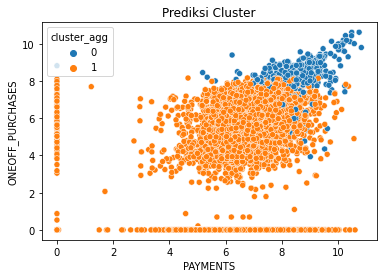

In [116]:
plt.title('Prediksi Cluster')
sns.scatterplot(data=df,x='PAYMENTS', y='ONEOFF_PURCHASES', hue='cluster_agg')
plt.show()

berdasarkan algoritma Agglomerrative clustering cluster terbaik adalah 2

Algoritma DBSCAN

In [143]:
DBS_clus = DBSCAN(eps=80, min_samples=10, metric='euclidean')
DBS_clus.fit(X_red)
df['cluster_DB'] = DBS_clus.labels_

In [131]:
DBS_clus.fit(X_red)

DBSCAN(eps=5)

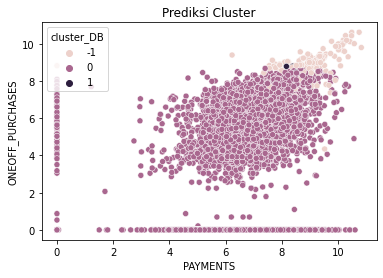

In [144]:
plt.title('Prediksi Cluster')
sns.scatterplot(data=df,x='PAYMENTS', y='ONEOFF_PURCHASES', hue='cluster_DB')
plt.show()

berdasarkan algoritma DBSCAN cluster terbaik adalah 3

Kesimpulan:
1. Tenor pembayaran kredit paling banyak pada tenor 12 bulan, hal ini terjadi karena semakin lama tenggat waktu konsumen lebih memiliki kesempatan untuk membayar.
2. Setelah dilakukan analisis melalui algoritma Kmeans didapatkan nilai clustering yang terbaik adalah 2
3. berdasarkan nilai Elbow juga menunjukkan bahwa clustering yang terbaik adala 2
4. Berdasarkan agglomratif clustering juga memberikan rekomendasi clustering 2
5. DBSCAN memberikan rekomendasi untuk 3 cluster
6. Untuk memberikan layanan terbaik pada konsumen, bank dapat membagi konsumen menjadi 2 cluster
